In [26]:
import numpy as np
import pandas as pd
import Funciones_sismos as BN
import matplotlib.pyplot as plt

EspectrosdeRespuesta. 
Los espectros de respuesta de aceleración, velocidad o desplazamiento, se emplean de acuerdo al tipo de análisis estructural que se realiza y a la filosofía de diseño que se emplee.

<img src='./images/spectro_resp.png'>

,0,1
0,0.00,0.480000
1,0.01,0.549189
2,0.02,0.618378
3,0.03,0.687568
4,0.04,0.756757
...,...,...
262,2.62,0.256578
263,2.63,0.255602
264,2.64,0.254634
265,2.65,0.253673


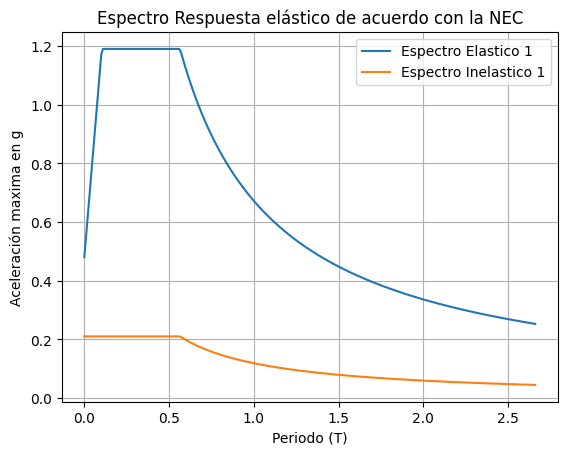

In [27]:
'''
Para diseño basado en fuerzas DBF.
'''

n = [2.48, 0]
z = [0.4, 0]      #Para un TR475 años
I = [1.3, 0]
fa = [1.2, 0]
fd = [1.11, 0]
fs = [1.11, 0]
r = [1, 0]
R = [7, 0]
fip = 0.9   #Coeficiente de castigo por irregularidad en planta.
fie = 0.9   #Coeficiente de castigo por irregularidad en elevacion.
g = 9.81
fip_ASCE = 1
fie_ASCE = 1

scale = 1 #Siempre uno
Tl = 2.4*fd[0]*scale
dt = Tl/0.01

num_spec = 1
Specarr = np.zeros((int(dt)+1,num_spec))
SpecIarr = np.zeros((int(dt)+1,num_spec))
Tmparr = np.zeros((int(dt)+1,num_spec))


for i in range(1, num_spec+1):
    Spec, SpecI, Tmp = BN.Spec_NEC(n[i-1], z[i-1], fa[i-1], fd[i-1], fs[i-1], r[i-1], I[i-1], R[i-1], fip, fie, scale)
    Specarr[:,i-1] = Spec[:,1]
    SpecIarr[:,i-1] = SpecI[:,1]
    plt.plot(Tmp, Specarr[:,i-1], label=f'Espectro Elastico {i}')
    plt.plot(Tmp, SpecIarr[:,i-1],  label=f'Espectro Inelastico {i}')
    #print(i)

plt.title('Espectro Respuesta elástico de acuerdo con la NEC')
plt.xlabel('Periodo (T)')
plt.ylabel('Aceleración maxima en g')
plt.legend()
plt.grid(True)
plt.show

tbl_Specarr = pd.DataFrame(Specarr)
tbl_SpecIarr = pd.DataFrame(SpecIarr)
tbl_Tmp = pd.DataFrame(Tmp)
#display(tbl_Specarr.style.set_caption('Espectro respuesta elástico'))
#display(tbl_SpecIarr.style.set_caption('Espectro respuesta inelástico'))
#display(tbl_Tmp.style.set_caption('Periodo'))
tbl_Spec = pd.DataFrame(Spec)
display(tbl_Spec)

In [28]:
#Guardando Los Datos del Primer espectro en un archivo .xlsx
Specarr_path = './EspectrosNEC_guardados/Espectro3.csv'
tbl_Spec.to_csv(Specarr_path, index=False)
print(f'Data has been saved to {Specarr_path}')

Data has been saved to ./EspectrosNEC_guardados/Espectro3.csv


<img src='./images/dt_web_Berkley.PNG' height='500px' width='700px'>

In [34]:
import csv
from openpyxl import Workbook

# Read the CSV file
csv_file = './EspectrosNEC_guardados/searchResults.csv'  # Replace with the path to your CSV file

# Create a new Workbook (XLSX file)
wb = Workbook()

# Create a new sheet in the Workbook
sheet = wb.active

# Open the CSV file and write its content to the XLSX sheet
with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        sheet.append(row)

# Specify the output XLSX file name
xlsx_file = './EspectrosNEC_guardados/searchResults.xlsx'  # Replace with the desired XLSX file name

# Save the Workbook to an XLSX file
wb.save(xlsx_file)
print('Conversion conseguida')

Conversion conseguida


In [35]:
xlsx_file = './EspectrosNEC_guardados/searchResults.xlsx'
tbl_Respuestas_Berkley = pd.read_excel(xlsx_file)
display(tbl_Respuestas_Berkley)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,PEER Ground Motion Database,Time Series Search Report -- NGA-West2 -- 202...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-- Summary of PEER Ground Motion Database Sea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Magnitude Min:,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,12.0,0.00155175,0.00173241,0.000716,0.00559582,0.01135635,0.00301,0.00290849,0.0050305,0.00742,...,0.000184,0.00549177,0.00358619,0.00297,0.01063714,0.01015971,0.00192,0.00593258,0.00774862,0.00348
276,13.0,0.00126021,0.0014709,0.000589,0.00476812,0.00944205,0.0024,0.00255223,0.00440966,0.00613,...,0.000154,0.00407254,0.00314707,0.00249,0.00812542,0.00851938,0.00162,0.00471777,0.00621317,0.00288
277,14.0,0.00113414,0.00126271,0.000491,0.00409071,0.00797098,0.00201,0.002237,0.00390377,0.00507,...,0.000131,0.0033226,0.00278872,0.0021,0.00651226,0.00720222,0.00138,0.00385,0.00495987,0.00237
278,15.0,0.00101195,0.00109473,0.000415,0.00353557,0.00681784,0.00172,0.00194374,0.00346935,0.0042,...,0.000111,0.00288094,0.00249285,0.00178,0.0054148,0.00614573,0.00119,0.00321782,0.00450767,0.00195


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.010,0.549189,0.757341,1.142834,0.501880,0.592437,0.642829,0.538014,0.706789,0.423284,0.697446,1.119705,1.544696,0.857930,0.440308,0.767315
1,0.020,0.618378,0.764117,1.156899,0.504689,0.592114,0.648717,0.557924,0.713084,0.426040,0.698080,1.129471,1.570587,0.864100,0.441011,0.764156
2,0.022,0.633989,0.769320,1.166572,0.507343,0.592541,0.651498,0.575217,0.714511,0.427267,0.703336,1.134318,1.588864,0.866216,0.442298,0.766448
3,0.025,0.655547,0.781641,1.189368,0.513686,0.593338,0.664737,0.619133,0.723432,0.426037,0.713906,1.136194,1.635316,0.870071,0.447184,0.768700
4,0.029,0.681497,0.796400,1.230701,0.515359,0.594594,0.669130,0.653606,0.721102,0.429152,0.720468,1.148959,1.718162,0.863237,0.450610,0.791376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,12.000,0.000000,0.007642,0.011905,0.004906,0.003618,0.007761,0.005937,0.015206,0.006779,0.008685,0.003142,0.004702,0.007416,0.011789,0.009029
107,13.000,0.000000,0.006288,0.009746,0.004057,0.003013,0.006485,0.005206,0.012694,0.005767,0.006933,0.002589,0.004012,0.005819,0.009435,0.007218
108,14.000,0.000000,0.005282,0.008114,0.003439,0.002640,0.005493,0.004597,0.010687,0.004947,0.005607,0.002176,0.003463,0.004905,0.007782,0.005809
109,15.000,0.000000,0.004527,0.006861,0.002987,0.002319,0.004708,0.004063,0.008980,0.004262,0.004589,0.001859,0.003020,0.004308,0.006565,0.005124


El valor máximo es: 6.04156847, y se encuentra en la fila: 110


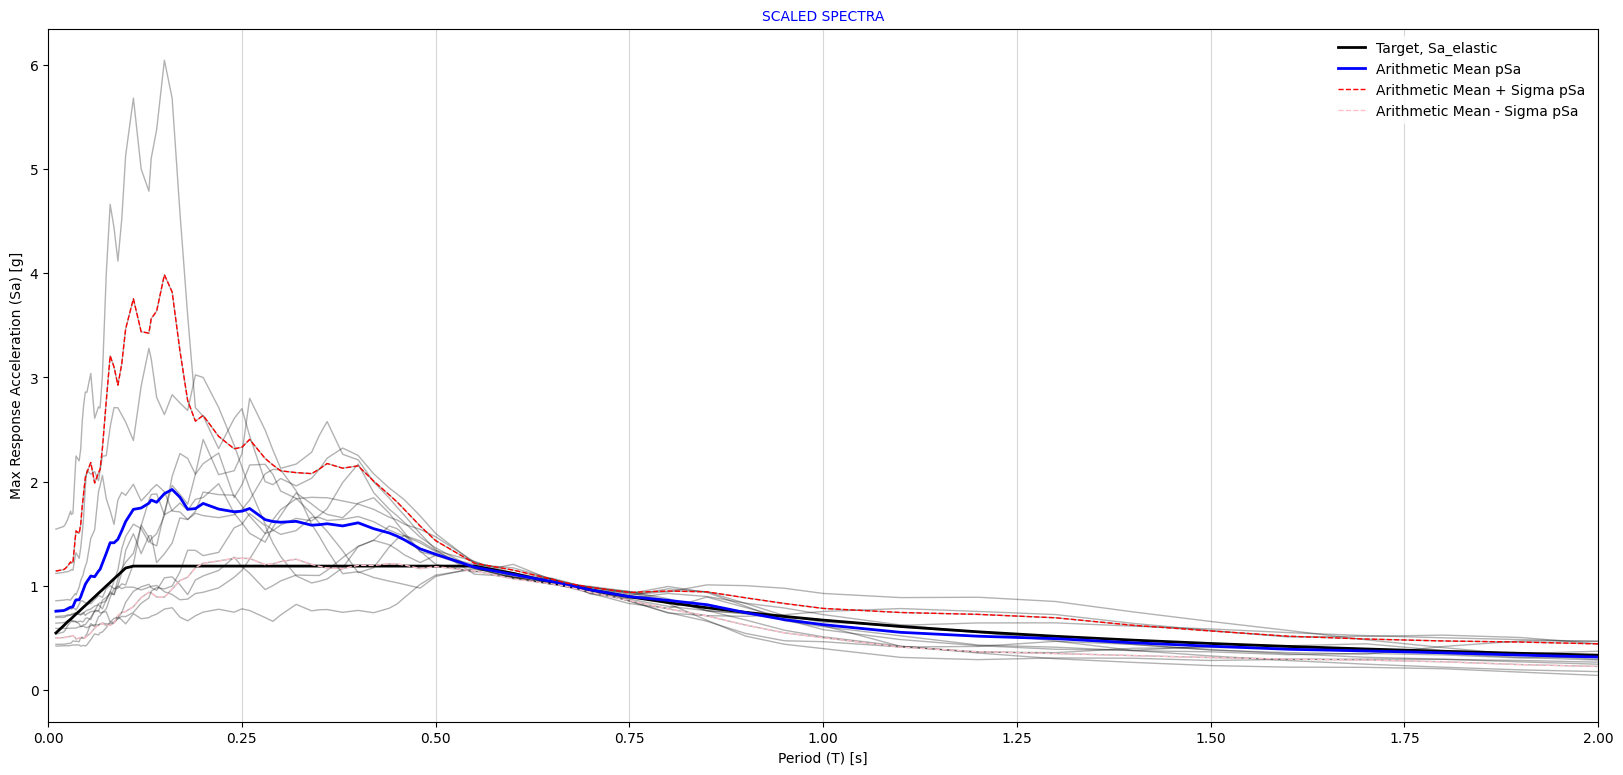

In [36]:
Datos_curvas = tbl_Respuestas_Berkley.iloc[55:166, 0:16]
Datos_curvas_Espectros = Datos_curvas.to_numpy
Espectro_respuestas_Berkley = Datos_curvas_Espectros()
Espectro_respuestas_Berkley = Espectro_respuestas_Berkley.astype(float)
tbl_Espectros = pd.DataFrame(Espectro_respuestas_Berkley)
display(tbl_Espectros)

maximo_sin_primera_columna = np.max(Espectro_respuestas_Berkley[:, 1:])
indice_bidimensional_max = np.unravel_index(np.argmax(Espectro_respuestas_Berkley, axis=None), Espectro_respuestas_Berkley.shape)
fila_max = indice_bidimensional_max[0]
valor_maximo = np.max(maximo_sin_primera_columna)
print(f"El valor máximo es: {valor_maximo}, y se encuentra en la fila: {fila_max}")


T = Espectro_respuestas_Berkley[:, 0]
Specs = Espectro_respuestas_Berkley[:, 1:]

fig, ax = plt.subplots(figsize=(20, 9)) 

ax.plot(T, Specs, color='black', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=1.0, alpha=0.3,linestyle = '-')
ax.plot(T, Specs[:,0], color='black', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=2.0, alpha=1,linestyle = '-',label= f'Target, Sa_elastic')
ax.plot(T, Specs[:,1], color='blue', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=2.0, alpha=1,linestyle = '-',label= f'Arithmetic Mean pSa')
ax.plot(T, Specs[:,2], color='red', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=1.0, alpha=1,linestyle = '--',label= f'Arithmetic Mean + Sigma pSa')
ax.plot(T, Specs[:,3], color='pink', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=1.0, alpha=1,linestyle = '--',label= f'Arithmetic Mean - Sigma pSa')

# Customize the plot as needed
ax.set_xlim(0, 2)
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
ax.set_title('Plots of Data Columns')

plt.title('SCALED SPECTRA', fontsize=10, color=(0, 0, 1))                                                    
plt.xlabel('Period (T) [s]', rotation=0, fontsize=10, color=(0, 0, 0))                                       
plt.ylabel('Max Response Acceleration (Sa) [g]', rotation=90, fontsize=10, color=(0, 0, 0))                     
legend = plt.legend(fontsize=10)                                                                                
legend.get_frame().set_edgecolor('none')                                                                        
ax.grid(which='both', axis='x', alpha=0.5) 
plt.show()

,0,1
0,0.010000,1.544696
1,0.020000,1.570587
2,0.022000,1.588864
3,0.025000,1.635316
4,0.029000,1.718162
5,0.030000,1.684225
6,0.032000,1.698175
7,0.035000,2.122103
8,0.036000,2.246336
9,0.040000,2.199218


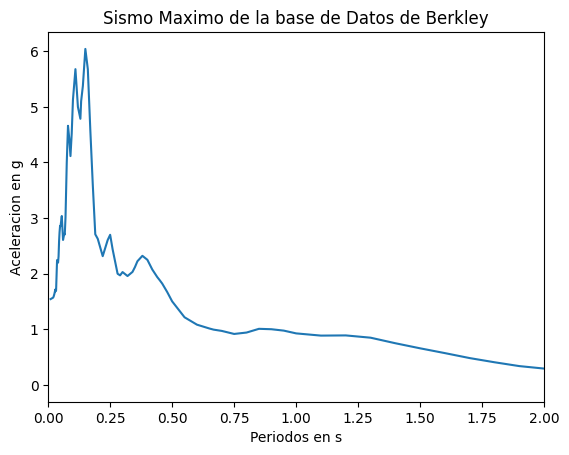

In [47]:
columna_1 = Espectro_respuestas_Berkley[:, 0]  # Primera columna
columna_13 = Espectro_respuestas_Berkley[:, 12]  # Columna 13
# Crea una nueva matriz combinando las dos columnas
Maximo_sismo = np.column_stack((columna_1, columna_13))

tbl_Maximo_Sismo = pd.DataFrame(Maximo_sismo)
display(tbl_Maximo_Sismo.style.set_caption('Sismo de mayor amplitud'))

plt.plot(Maximo_sismo[:,0], Maximo_sismo[:,1])
plt.xlim(0, 2) 
plt.title('Sismo Maximo de la base de Datos de Berkley')
plt.xlabel('Periodos en s')
plt.ylabel('Aceleracion en g')
plt.show()

In [48]:
# Guardar la matriz en un archivo de texto
np.savetxt('./EspectrosNEC_guardados/Sismo_maximo.txt', Maximo_sismo, delimiter=',', fmt='%f')
print('Sismo maximo guardado con exito en: ./EspectrosNEC_guardados/Sismo_maximo.txt')

Sismo maximo guardado con exito en: ./EspectrosNEC_guardados/Sismo_maximo.txt
